In [15]:
import os
import numpy as np
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
spark = SparkSession.builder.appName('lrg').getOrCreate()
print(spark)

#### Linear Regression ####

In [4]:
from pyspark.ml.regression import LinearRegression

In [7]:
data = spark.read.format("libsvm").load('../data/sample_linear_regression_data.txt')
data.printSchema()
print(data.count())

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)

501


In [6]:
data.show()

+-------------------+--------------------+
|              label|            features|
+-------------------+--------------------+
| -9.490009878824548|(10,[0,1,2,3,4,5,...|
| 0.2577820163584905|(10,[0,1,2,3,4,5,...|
| -4.438869807456516|(10,[0,1,2,3,4,5,...|
|-19.782762789614537|(10,[0,1,2,3,4,5,...|
| -7.966593841555266|(10,[0,1,2,3,4,5,...|
| -7.896274316726144|(10,[0,1,2,3,4,5,...|
| -8.464803554195287|(10,[0,1,2,3,4,5,...|
| 2.1214592666251364|(10,[0,1,2,3,4,5,...|
| 1.0720117616524107|(10,[0,1,2,3,4,5,...|
|-13.772441561702871|(10,[0,1,2,3,4,5,...|
| -5.082010756207233|(10,[0,1,2,3,4,5,...|
|  7.887786536531237|(10,[0,1,2,3,4,5,...|
| 14.323146365332388|(10,[0,1,2,3,4,5,...|
|-20.057482615789212|(10,[0,1,2,3,4,5,...|
|-0.8995693247765151|(10,[0,1,2,3,4,5,...|
| -19.16829262296376|(10,[0,1,2,3,4,5,...|
|  5.601801561245534|(10,[0,1,2,3,4,5,...|
|-3.2256352187273354|(10,[0,1,2,3,4,5,...|
| 1.5299675726687754|(10,[0,1,2,3,4,5,...|
| -0.250102447941961|(10,[0,1,2,3,4,5,...|
+----------

In [12]:
##### Training with full data #####
lr = LinearRegression(featuresCol='features',labelCol='label',predictionCol='preds',maxIter = 10,
                     regParam=0.3,elasticNetParam=0.8)

trainedModel = lr.fit(data)

In [14]:
print('coefficients : ',trainedModel.coefficients)
print('intercept : ',trainedModel.intercept)
summary = trainedModel.summary
print('R^2 score : ',summary.r2)
print('Mean squared Error : ',summary.rootMeanSquaredError)
summary.residuals.show()

coefficients :  [0.0,0.32292516677405936,-0.3438548034562218,1.9156017023458414,0.05288058680386263,0.765962720459771,0.0,-0.15105392669186682,-0.21587930360904642,0.22025369188813426]
intercept :  0.1598936844239736
R^2 score :  0.022861466913958184
Mean squared Error :  10.189077167598475


Text(0, 0.5, 'loss')

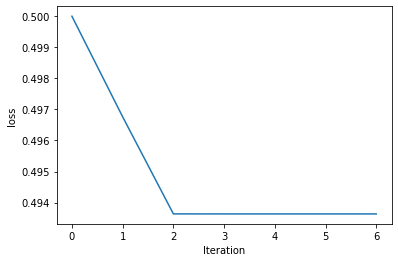

In [21]:
plt.plot(summary.objectiveHistory)
plt.xlabel('Iteration')
plt.ylabel('loss')

In [22]:
######## Training with train and test split ############

In [23]:
all_data = spark.read.format('libsvm').load('../data/sample_linear_regression_data.txt')
print(all_data.count())

501


In [25]:
train_data,test_data = all_data.randomSplit([0.7,0.3])
print(train_data.count(),test_data.count())

371 130


coefficients :  [0.0,0.1286584761505309,-0.36555728132020815,2.523995816149882,0.0,0.17731923835531402,0.0,-0.3036993169562027,-0.24355646410209925,0.03787443853644392]
intercept :  0.10995784950756873
R^2 score :  0.02664439880628755
Mean squared Error :  10.4781174260138
+-------------------+
|          residuals|
+-------------------+
|-27.612642290755467|
|-29.066391141480118|
| -24.51005489059308|
|-20.984509484743963|
|-23.430955046153723|
|-24.460642346063356|
|-21.008673510099655|
| -20.48955408487685|
|  -21.9402031152567|
|-21.234320056392466|
| -20.80670156109031|
|-21.140045858342074|
|-19.904672115992945|
|-20.063859298105587|
| -18.36461145087947|
| -20.08576491328342|
| -17.55172193610647|
|-15.247470334692487|
|-18.798657092124866|
|-14.965707210821893|
+-------------------+
only showing top 20 rows



Text(0, 0.5, 'loss')

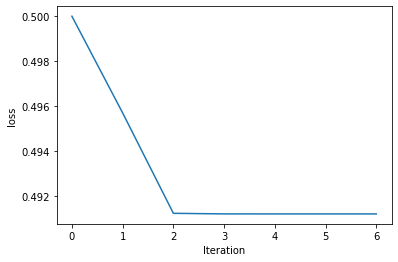

In [26]:
trainedModel = lr.fit(train_data)

print('coefficients : ',trainedModel.coefficients)
print('intercept : ',trainedModel.intercept)
summary = trainedModel.summary
print('R^2 score : ',summary.r2)
print('Mean squared Error : ',summary.rootMeanSquaredError)
summary.residuals.show()

## loss plot
plt.plot(summary.objectiveHistory)
plt.xlabel('Iteration')
plt.ylabel('loss')

In [31]:
preds = trainedModel.evaluate(test_data)

print('R^2 score : ',preds.r2)
print('RMSE : ',preds.rootMeanSquaredError)

R^2 score :  -0.00494283421483388
RMSE :  9.379904914678546
